Select a story:
1. Funny Ice Cream Chase
2. Hero Villain Fight
Enter story number (1 or 2): 2

Select Comic Layout: 1. Horizontal (1x4), 2. Vertical (4x1)
Enter layout (1 or 2): 1

Choose Backgrounds for Each Scene (Options: 1. forest_glade, 2. city_day, 3. forest_path)
Select background for Panel 1: 2
Select background for Panel 2: 1
Select background for Panel 3: 2
Select background for Panel 4: 3

Character Options:
1. Hero Action
2. Hero Happy
3. Villain Cute
4. Villain Classic

PANEL 1 DIALOGUE:
Hero says: Prepare to face justice!
Villain says: Justice is boring!
Select hero image for Panel 1 (1: Hero Action, 2: Hero Happy): 1
Select villain image for Panel 1 (3: Villain Cute, 4: Villain Classic): 3

PANEL 2 DIALOGUE:
Hero says: You’ll never win!
Villain says: Watch me win!
Select hero image for Panel 2 (1: Hero Action, 2: Hero Happy): 1
Select villain image for Panel 2 (3: Villain Cute, 4: Villain Classic): 3

PANEL 3 DIALOGUE:
Hero says: Give up now!
Villain says: Never surrende

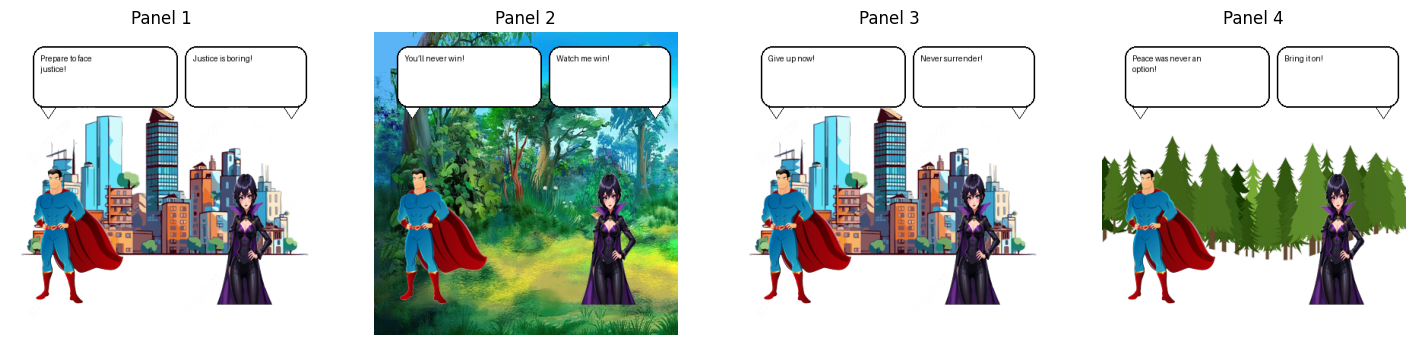

Comic strip saved successfully!


In [24]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import textwrap

# Helper function to load image
def load_image(path):
    return Image.open(path).convert("RGBA")

# Load all characters
characters = {
    1: load_image('hero_action.png'),
    2: load_image('hero_happy.png'),
    3: load_image('villan_cute.png'),
    4: load_image('villian_classic.png')
}

character_names = {
    1: 'Hero Action',
    2: 'Hero Happy',
    3: 'Villain Cute',
    4: 'Villain Classic'
}

# Load backgrounds
backgrounds = [
    'forest_glade.jpg',
    'city_day.png',
    'forest_path.png'
]

# Predefined Dialogues
stories = {
    1: {  # Funny Ice Cream Chase
        'hero': ["Hey! That’s my ice cream!", "You can't outrun me!", "Stop right there!", "Okay, let’s share it!"],
        'villain': ["Oops! Too late, hero!", "Catch me if you can!", "No way, it's mine!", "Deal!"]
    },
    2: {  # Hero Villain Fight
        'hero': ["Prepare to face justice!", "You’ll never win!", "Give up now!", "Peace was never an option!"],
        'villain': ["Justice is boring!", "Watch me win!", "Never surrender!", "Bring it on!"]
    }
}

# Select story
print("Select a story:")
print("1. Funny Ice Cream Chase")
print("2. Hero Villain Fight")
story_choice = int(input("Enter story number (1 or 2): "))

hero_dialogs = stories[story_choice]['hero']
villain_dialogs = stories[story_choice]['villain']

# Select layout
print("\nSelect Comic Layout: 1. Horizontal (1x4), 2. Vertical (4x1)")
layout_choice = int(input("Enter layout (1 or 2): "))

# Select backgrounds
print("\nChoose Backgrounds for Each Scene (Options: 1. forest_glade, 2. city_day, 3. forest_path)")
bg_choices = []
for i in range(4):
    bg_choice = int(input(f"Select background for Panel {i+1}: "))
    bg_choices.append(backgrounds[bg_choice - 1])

# Character Selection by Number
print("\nCharacter Options:")
print("1. Hero Action")
print("2. Hero Happy")
print("3. Villain Cute")
print("4. Villain Classic")

hero_images = []
villain_images = []

for i in range(4):
    print(f"\nPANEL {i+1} DIALOGUE:")
    print(f"Hero says: {hero_dialogs[i]}")
    print(f"Villain says: {villain_dialogs[i]}")

    hero_choice = int(input(f"Select hero image for Panel {i+1} (1: Hero Action, 2: Hero Happy): "))
    villain_choice = int(input(f"Select villain image for Panel {i+1} (3: Villain Cute, 4: Villain Classic): "))

    if hero_choice not in [1, 2]:
        print("Invalid hero image. Defaulting to Hero Action.")
        hero_choice = 1

    if villain_choice not in [3, 4]:
        print("Invalid villain image. Defaulting to Villain Cute.")
        villain_choice = 3

    hero_images.append(characters[hero_choice])
    villain_images.append(characters[villain_choice])

# Load font
font = ImageFont.load_default()

# Draw speech bubble with text wrapping
def draw_speech_bubble(draw, x1, y1, x2, y2, text, tail_position='left', font=ImageFont.load_default()):
    max_chars_per_line = 20  # Adjust for bubble size

    # Wrap text
    wrapped_text = textwrap.fill(text, width=max_chars_per_line)

    # Draw rounded bubble
    draw.rounded_rectangle([x1, y1, x2, y2], radius=15, fill="white", outline="black", width=2)

    # Draw tail
    if tail_position == 'left':
        draw.polygon([(x1 + 10, y2), (x1 + 30, y2), (x1 + 20, y2 + 15)], fill="white", outline="black")
    else:
        draw.polygon([(x2 - 10, y2), (x2 - 30, y2), (x2 - 20, y2 + 15)], fill="white", outline="black")

    # Draw wrapped text
    draw.multiline_text((x1 + 10, y1 + 10), wrapped_text, fill="black", font=font, spacing=4)

# Comic panel generator
comic_panels = []
for i in range(4):
    bg = load_image(bg_choices[i]).resize((400, 400))
    hero_resized = hero_images[i].resize((120, 180))
    villain_resized = villain_images[i].resize((120, 180))

    # Paste hero on left, villain on right
    bg.paste(hero_resized, (30, 180), hero_resized)
    bg.paste(villain_resized, (250, 180), villain_resized)

    draw = ImageDraw.Draw(bg)

    # Hero speech bubble (top left)
    draw_speech_bubble(draw, 30, 20, 220, 100, hero_dialogs[i], tail_position='left', font=font)

    # Villain speech bubble (top right)
    draw_speech_bubble(draw, 230, 20, 390, 100, villain_dialogs[i], tail_position='right', font=font)

    comic_panels.append(bg)

# Plot comic panels
if layout_choice == 1:
    fig, axs = plt.subplots(1, 4, figsize=(18, 6))
else:
    fig, axs = plt.subplots(4, 1, figsize=(6, 18))

for i, ax in enumerate(axs):
    ax.imshow(comic_panels[i])
    ax.axis('off')
    ax.set_title(f"Panel {i+1}")

plt.show()

# Save the comic
if layout_choice == 1:
    comic_panels[0].save('comic_strip_horizontal.png', save_all=True, append_images=comic_panels[1:], duration=1000, loop=0)
else:
    comic_panels[0].save('comic_strip_vertical.png', save_all=True, append_images=comic_panels[1:], duration=1000, loop=0)

print("Comic strip saved successfully!")
